In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Pour un affichage clair
%matplotlib inline
sns.set(style="whitegrid")
df = pd.read_csv("Desktop/data1.csv", sep=';')
df.head()


,region,Prix,Surface(m2),Proximiteplage,TitreFoncier,EauDisponible,electricite,Cloture,NbArbres,TypedeCulture,Irrigation,batiment,route
0,Hammam El Gheza,63000.0,1000.0,1,1,0,0,0,0,0,0,0,0
1,Kerkouane,1410000.0,2350.0,0,1,0,0,0,0,0,0,0,0
2,Dar Allouche,730400.0,913.0,0,1,0,0,0,0,0,0,0,0
3,Kelibia,2132500.0,853.0,0,1,0,0,0,0,0,0,0,0
4,Menzel Bouzelfa,700000.0,30000.0,0,0,0,0,0,0,0,0,0,0


In [3]:
# Nombre d'occurrences par région
region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['Région', 'Nombre de terrains']

# Affichage
region_counts


,Région,Nombre de terrains
0,Hammam El Gheza,159
1,Ezzahra,134
2,Dar Allouche,112
3,Hammam Jebli,105
4,Kelibia,101
...,...,...
169,Bou Lazhar,1
170,Kasserine,1
171,Bou Ali,1
172,El Mhedhba,1


In [4]:
df = df.drop_duplicates()
nb_duplicates = df.duplicated().sum()
print(f"🔍 Nombre de lignes dupliquées : {nb_duplicates}")


🔍 Nombre de lignes dupliquées : 0


In [5]:
from sklearn.preprocessing import StandardScaler

# Encodage de la région
le = LabelEncoder()
df['region_encoded'] = le.fit_transform(df['region'])

# Définir les features et la target
X = df[['region_encoded', 'Surface(m2)', 'Proximiteplage', 'TitreFoncier', 'EauDisponible',
        'electricite', 'Cloture', 'NbArbres', 'TypedeCulture', 'Irrigation',
        'batiment', 'route']].apply(pd.to_numeric, errors='coerce').fillna(0)

y = df['Prix']
# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation training / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Number of rows in X_train: 1077")
print(f"Number of rows in X_test: 269")
print(f"Number of rows in y_train: 1077")
print(f"Number of rows in y_test: 269")


Number of rows in X_train: 1077
Number of rows in X_test: 269
Number of rows in y_train: 1077
Number of rows in y_test: 269


In [6]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))


Linear Regression R²: 0.05697819578809238


In [7]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))


Ridge Regression R²: 0.056652829093553736


C:\Users\chate\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.96709e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [8]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

print("Lasso Regression R²:", r2_score(y_test, y_pred_lasso))


Lasso Regression R²: 0.05697800104100359


In [9]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest R²: 0.08790758736584803


In [10]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

print("Gradient Boosting R²:", r2_score(y_test, y_pred_gb))


Gradient Boosting R²: 0.1235935678947182


In [11]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost R²: -0.12626321408680896


In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Entraîner le meilleur modèle
best_xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=444,
    max_depth=11,
    learning_rate=0.1728,
    subsample=0.9934,
    colsample_bytree=0.6405,
    min_child_weight=1,
    verbosity=0
)

best_xgb.fit(X_train, y_train)

# Évaluation sur le test set
y_pred = best_xgb.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"🎯 R² sur test : {round(r2, 4)}")
print(f"📉 MAE         : {round(mae, 2)}")
print(f"📉 RMSE        : {round(rmse, 2)}")


🎯 R² sur test : 0.1307
📉 MAE         : 475587.23
📉 RMSE        : 1015264.88


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb  

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# Évaluation
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Modèle": name,
        "MAE": round(mean_absolute_error(y_test, y_pred), 2),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
        "MSE": round(mean_squared_error(y_test, y_pred), 2),
        "R²": round(r2_score(y_test, y_pred), 4),
        "MAPE": round(mean_absolute_percentage_error(y_test, y_pred), 4),
        "MedAE": round(median_absolute_error(y_test, y_pred), 2)
    })

# Résultat final
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False).reset_index(drop=True)
display(results_df)

C:\Users\chate\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.96709e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,Modèle,MAE,RMSE,MSE,R²,MAPE,MedAE
0,Gradient Boosting,522452.87,1019424.35,1.039226e+12,0.1236,2.4708,239949.15
1,Random Forest,489638.80,1039972.00,1.081542e+12,0.0879,2.0778,172382.20
2,Linear Regression,613637.54,1057457.92,1.118217e+12,0.0570,2.7729,461664.08
3,Lasso Regression,613637.47,1057458.03,1.118217e+12,0.0570,2.7729,461663.20
4,Ridge Regression,613615.77,1057640.33,1.118603e+12,0.0567,2.7722,460566.04
5,XGBoost,510380.79,1155638.97,1.335501e+12,-0.1263,1.9336,174480.81


In [14]:
# 📚 Importer
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 📈 Créer le modèle
lgbm_model = LGBMRegressor(
    n_estimators=500,      # nombre d'arbres
    learning_rate=0.1,     # taux d'apprentissage
    max_depth=6,           # profondeur max des arbres
    random_state=42
)

# 🚀 Entraîner le modèle
lgbm_model.fit(X_train, y_train)

# 📊 Prédire sur le test set
y_pred_lgbm = lgbm_model.predict(X_test)

# 🎯 Évaluer
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

print(f"🎯 LightGBM R²: {round(r2_lgbm, 4)}")
print(f"📉 MAE: {round(mae_lgbm, 2)} TND")
print(f"📉 RMSE: {round(rmse_lgbm, 2)} TND")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 562, number of used features: 11
[LightGBM] [Info] Start training from score 766849.800712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

C:\Users\chate\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\chate\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [15]:
# 📚 Imports nécessaires
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 📍 1. Définir le modèle XGBoost de base
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Pour régression classique
    random_state=42,
    n_jobs=-1
)

# 📍 2. Définir la grille des hyperparamètres pour optimisation
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

# 📍 3. Configurer GridSearchCV pour XGBoost
grid_search_xgb = GridSearchCV(
    xgb_model,
    param_grid_xgb,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# 📍 4. Entraîner GridSearch sur X_train / y_train
grid_search_xgb.fit(X_train, y_train)

# 📍 5. Meilleurs hyperparamètres
print(f"✅ Meilleurs hyperparamètres XGBoost : {grid_search_xgb.best_params_}")

# 📍 6. Prédictions sur le test set
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# 📍 7. Évaluation
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\n🏆 Résultats modèle XGBoost optimisé :")
print(f"🎯 R²: {round(r2_xgb, 4)}")
print(f"📉 MAE: {round(mae_xgb, 2)} TND")
print(f"📉 RMSE: {round(rmse_xgb, 2)} TND")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Meilleurs hyperparamètres XGBoost : {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}

🏆 Résultats modèle XGBoost optimisé :
🎯 R²: 0.2221
📉 MAE: 479454.19 TND
📉 RMSE: 960412.77 TND


In [16]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
df = pd.read_csv("Desktop/data1.csv", sep=';')

df['region_encoded'] = LabelEncoder().fit_transform(df['region'])

q95 = df['Prix'].quantile(0.95)
df_filtered = df[df['Prix'] <= q95]

# 🔹 Préparer X et y
X_filtered = df_filtered[['region_encoded', 'Surface(m2)', 'Proximiteplage', 'TitreFoncier', 'EauDisponible',
                          'electricite', 'Cloture', 'NbArbres', 'TypedeCulture', 'Irrigation',
                          'batiment', 'route']].apply(pd.to_numeric, errors='coerce').fillna(0)
y_filtered = df_filtered['Prix']

# ✅ Étape 2 : Split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# ✅ Étape 3 : Réentraîner le modèle robuste
model_filtered = HistGradientBoostingRegressor(max_iter=300, random_state=42)
model_filtered.fit(X_train, y_train)

# ✅ Étape 4 : Évaluer
y_pred = model_filtered.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🎯 R²     : {round(r2, 4)}")
print(f"📉 MAE    : {round(mae, 2)} TND")
print(f"📉 RMSE   : {round(rmse, 2)} TND")

🎯 R²     : 0.815
📉 MAE    : 128091.46 TND
📉 RMSE   : 255874.74 TND


In [17]:
# 📚 Importations
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd



df['region_encoded'] = LabelEncoder().fit_transform(df['region'])

q95 = df['Prix'].quantile(0.95)
df_filtered = df[df['Prix'] <= q95]

X_filtered = df_filtered[['region_encoded', 'Surface(m2)', 'Proximiteplage', 'TitreFoncier', 'EauDisponible',
                          'electricite', 'Cloture', 'NbArbres', 'TypedeCulture', 'Irrigation',
                          'batiment', 'route']].apply(pd.to_numeric, errors='coerce').fillna(0)
y_filtered = df_filtered['Prix']

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# 📈 Définir l'espace de recherche précis
param_grid = {
    'max_iter': [280, 300, 320],        # autour de 300
    'max_leaf_nodes': [50, 60, 70],     # proche de ton modèle actuel
    'max_depth': [5, 6, 7],             # profondeurs raisonnables
    'min_samples_leaf': [5, 10, 15]     # éviter overfitting
}

# 🔍 Configurer GridSearchCV
grid_search = GridSearchCV(
    HistGradientBoostingRegressor(
        learning_rate=0.1,               # Fixé à 0.1 car très bon
        l2_regularization=0.0,            # Pas de régularisation
        early_stopping=True,
        random_state=42
    ),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# 🚀 Entraîner GridSearch
grid_search.fit(X_train, y_train)

# 🎯 Résultats
print(f"Meilleurs hyperparamètres trouvés : {grid_search.best_params_}")
print(f"Meilleur score CV (R²) : {grid_search.best_score_:.4f}")

# 📈 Utiliser le meilleur modèle trouvé
best_model = grid_search.best_estimator_

# 📊 Évaluer sur test set
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"\n🎯 R² après tuning     : {round(r2_best, 4)}")
print(f"📉 MAE après tuning    : {round(mae_best, 2)} TND")
print(f"📉 RMSE après tuning   : {round(rmse_best, 2)} TND")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Meilleurs hyperparamètres trouvés : {'max_depth': 7, 'max_iter': 280, 'max_leaf_nodes': 70, 'min_samples_leaf': 5}
Meilleur score CV (R²) : 0.7620

🎯 R² après tuning     : 0.8003
📉 MAE après tuning    : 148720.74 TND
📉 RMSE après tuning   : 265835.58 TND


In [19]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score


# 📚 Bagging based on  HistGradientBoosting
bagging_model = BaggingRegressor(
    estimator=HistGradientBoostingRegressor(max_iter=300, random_state=42),
    n_estimators=10,         # 10 models
    random_state=42,
    n_jobs=-1
)

# 🚀 crossed validation 
cv_scores_bagging = cross_val_score(
    bagging_model, 
    X_filtered, 
    y_filtered, 
    cv=5, 
    scoring='r2',
    n_jobs=-1
)

# 📋 Affichage des résultats Bagging
print(f"Cross-Validation R² scores (Bagging): {np.round(cv_scores_bagging, 4)}")
print(f"Mean CV R² (Bagging): {round(np.mean(cv_scores_bagging), 4)}")
print(f"Std Dev CV R² (Bagging): {round(np.std(cv_scores_bagging), 4)}")


Cross-Validation R² scores (Bagging): [0.7126 0.7862 0.9104 0.7799 0.688 ]
Mean CV R² (Bagging): 0.7754
Std Dev CV R² (Bagging): 0.0774


In [20]:
# 📚 Import déjà fait
from sklearn.ensemble import BaggingRegressor

# ✅ 1. Recréer ton modèle Bagging (base = HistGradientBoosting)
final_bagging_model = BaggingRegressor(
    estimator=HistGradientBoostingRegressor(max_iter=300, random_state=42),
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

# ✅ 2. Entraîner sur ton set d'entraînement
final_bagging_model.fit(X_train, y_train)

# ✅ 3. Prédire sur le test set
y_pred_bagging = final_bagging_model.predict(X_test)

# ✅ 4. Évaluer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_bagging = r2_score(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))

print(f"🎯 Final Bagging R²: {round(r2_bagging, 4)}")
print(f"📉 MAE: {round(mae_bagging, 2)} TND")
print(f"📉 RMSE: {round(rmse_bagging, 2)} TND")


🎯 Final Bagging R²: 0.8341
📉 MAE: 121754.28 TND
📉 RMSE: 242289.05 TND


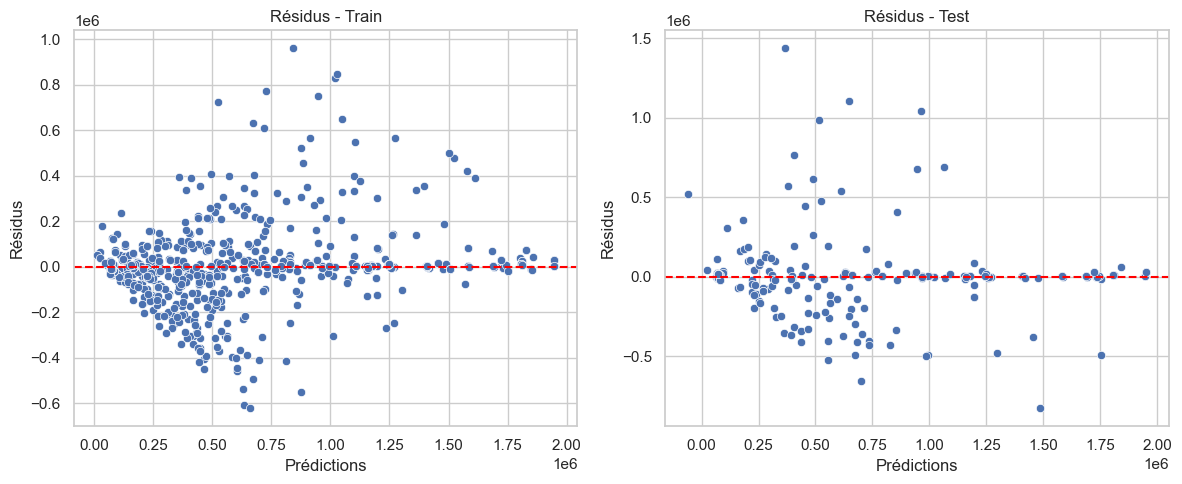

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reprédire pour résidus
y_train_pred = final_bagging_model.predict(X_train)
y_test_pred = final_bagging_model.predict(X_test)

# Résidus
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(12,5))

# Résidus train
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred, y=residuals_train)
plt.axhline(0, color='red', linestyle='--')
plt.title('Résidus - Train')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')

# Résidus test
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred, y=residuals_test)
plt.axhline(0, color='red', linestyle='--')
plt.title('Résidus - Test')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')

plt.tight_layout()
plt.show()


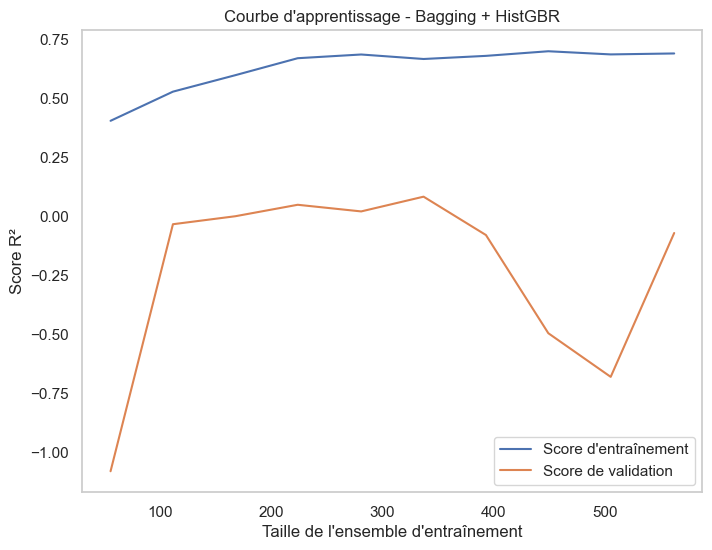

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    final_bagging_model, X, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score R²")
plt.title("Courbe d'apprentissage - Bagging + HistGBR")
plt.legend()
plt.grid()
plt.show()


🎯 R² après transformation log: 0.8151
📉 MAE: 117943.00 TND
📉 RMSE: 255813.59 TND


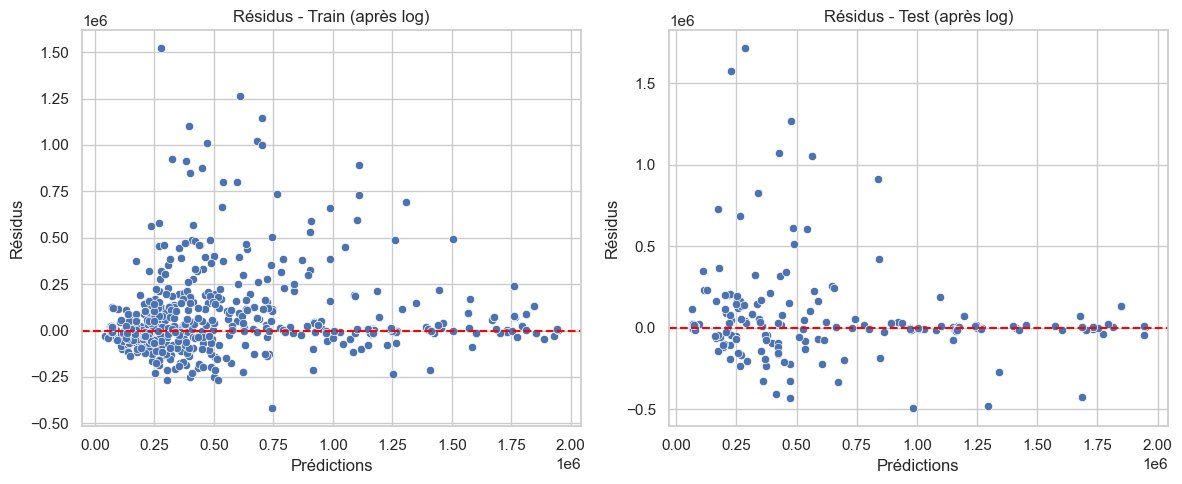

⭐️ Moyenne R² en cross-validation (avec log transformé) : 0.2231


In [23]:
# 📚 Imports nécessaires
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 📍 1. Transformer la cible (log1p)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# 📍 2. Réentraîner ton modèle Bagging sur la cible transformée
final_bagging_model.fit(X_train, y_train_log)

# 📍 3. Prédire sur le test set
y_pred_log = final_bagging_model.predict(X_test)

# 📍 4. Revenir à l'échelle réelle (expm1)
y_pred_real = np.expm1(y_pred_log)

# 📍 5. Évaluer les performances
r2 = r2_score(y_test, y_pred_real)
mae = mean_absolute_error(y_test, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_real))

print(f"🎯 R² après transformation log: {r2:.4f}")
print(f"📉 MAE: {mae:.2f} TND")
print(f"📉 RMSE: {rmse:.2f} TND")

# 📍 6. Résidus - Visualisation
y_train_pred_log = final_bagging_model.predict(X_train)
y_train_pred_real = np.expm1(y_train_pred_log)

residuals_train = y_train - y_train_pred_real
residuals_test = y_test - y_pred_real

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred_real, y=residuals_train)
plt.axhline(0, color='red', linestyle='--')
plt.title('Résidus - Train (après log)')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_real, y=residuals_test)
plt.axhline(0, color='red', linestyle='--')
plt.title('Résidus - Test (après log)')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')

plt.tight_layout()
plt.show()

# 📍 7. Learning Curve - Visualisation
train_sizes, train_scores, test_scores = learning_curve(
    final_bagging_model, X, np.log1p(y), cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score R² (log)")
plt.title("Courbe d'apprentissage - Bagging + HistGBR (après log)")
plt.legend()
plt.grid()

# 📍 8. Validation croisée sur tout le dataset (optionnel, bonus)
r2_cv = cross_val_score(final_bagging_model, X, np.log1p(y), cv=5, scoring='r2', n_jobs=-1)
print(f"⭐️ Moyenne R² en cross-validation (avec log transformé) : {r2_cv.mean():.4f}")


In [24]:
# 📚 Imports nécessaires
from sklearn.ensemble import BaggingRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # si erreur sur HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 📍 1. Créer un modèle simplifié (plus régularisé)
# Paramètres importants pour limiter l'overfitting :
# - max_leaf_nodes : limite la complexité des arbres
# - min_samples_leaf : évite d'apprendre sur très peu d'exemples
# - learning_rate : ralentit l'apprentissage pour éviter d'aller trop vite

base_model = HistGradientBoostingRegressor(
    max_iter=300,
    max_leaf_nodes=20,         # limitation du nombre de feuilles
    min_samples_leaf=10,       # minimum d'exemples par feuille
    learning_rate=0.05,        # learning rate plus lent
    random_state=42
)

final_bagging_model_simplified = BaggingRegressor(
    estimator=base_model,
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

# 📍 2. Entraîner
final_bagging_model_simplified.fit(X_train, y_train)

# 📍 3. Prédire
y_pred_bagging_simplified = final_bagging_model_simplified.predict(X_test)

# 📍 4. Évaluer
r2_bagging_simplified = r2_score(y_test, y_pred_bagging_simplified)
mae_bagging_simplified = mean_absolute_error(y_test, y_pred_bagging_simplified)
rmse_bagging_simplified = np.sqrt(mean_squared_error(y_test, y_pred_bagging_simplified))

print(f"🎯 Final Bagging (Simplifié) R²: {round(r2_bagging_simplified, 4)}")
print(f"📉 MAE: {round(mae_bagging_simplified, 2)} TND")
print(f"📉 RMSE: {round(rmse_bagging_simplified, 2)} TND")


C:\Users\chate\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


🎯 Final Bagging (Simplifié) R²: 0.8255
📉 MAE: 127992.01 TND
📉 RMSE: 248503.31 TND


In [25]:
# 📚 Imports nécessaires
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 📍 1. Définir le modèle de base
base_model = HistGradientBoostingRegressor(
    max_iter=300,
    random_state=42
)

# 📍 2. Emballer dans un Bagging
bagging_model = BaggingRegressor(
    estimator=base_model,
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

# 📍 3. Définir la grille des hyperparamètres
param_grid = {
    'estimator__max_leaf_nodes': [10, 20, 30, 40],
    'estimator__min_samples_leaf': [5, 10, 20],
    'estimator__learning_rate': [0.01, 0.05, 0.1]
}

# 📍 4. Définir la recherche
grid_search = GridSearchCV(
    bagging_model,
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# 📍 5. Lancer la recherche
grid_search.fit(X_train, y_train)

# 📍 6. Meilleurs paramètres
print(f"✅ Meilleurs hyperparamètres trouvés : {grid_search.best_params_}")

# 📍 7. Évaluer sur le test set
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"🎯 Best Bagging R²: {round(r2_best, 4)}")
print(f"📉 MAE: {round(mae_best, 2)} TND")
print(f"📉 RMSE: {round(rmse_best, 2)} TND")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Meilleurs hyperparamètres trouvés : {'estimator__learning_rate': 0.1, 'estimator__max_leaf_nodes': 40, 'estimator__min_samples_leaf': 10}
🎯 Best Bagging R²: 0.8257
📉 MAE: 117684.16 TND
📉 RMSE: 248351.02 TND


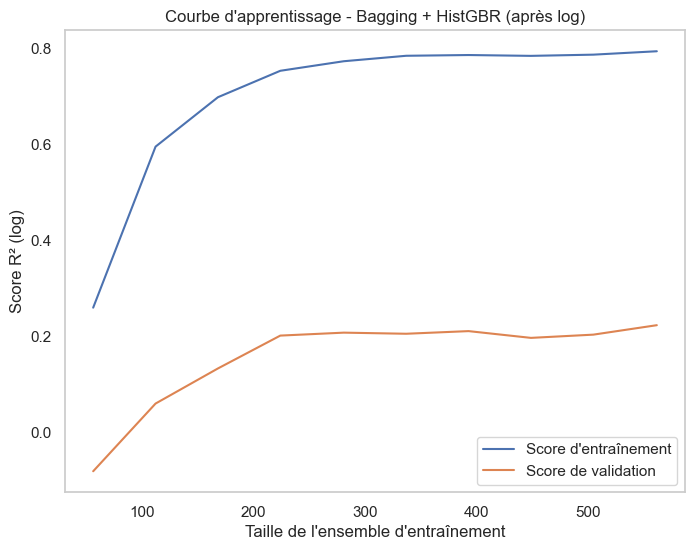

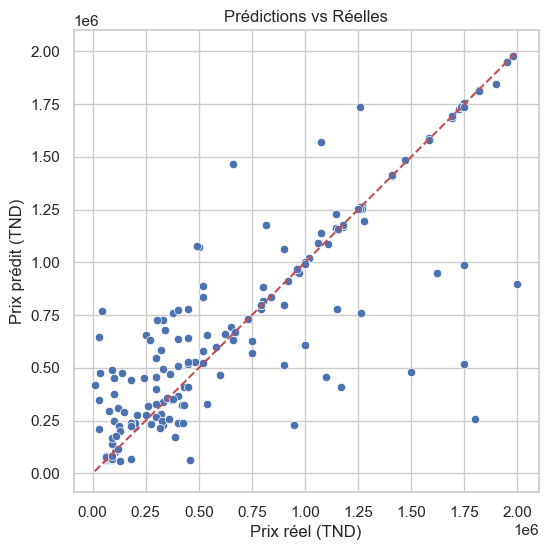

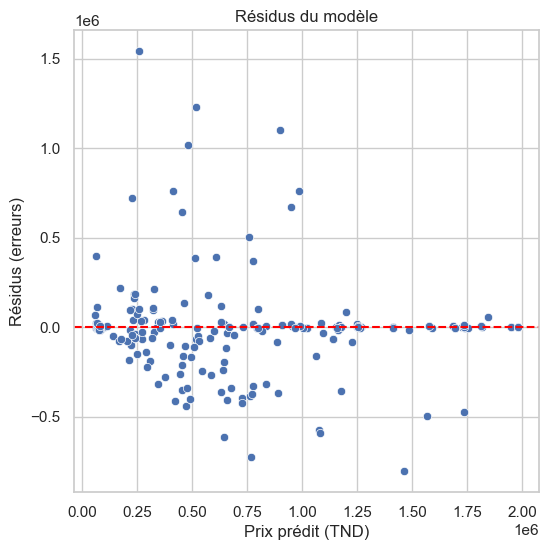

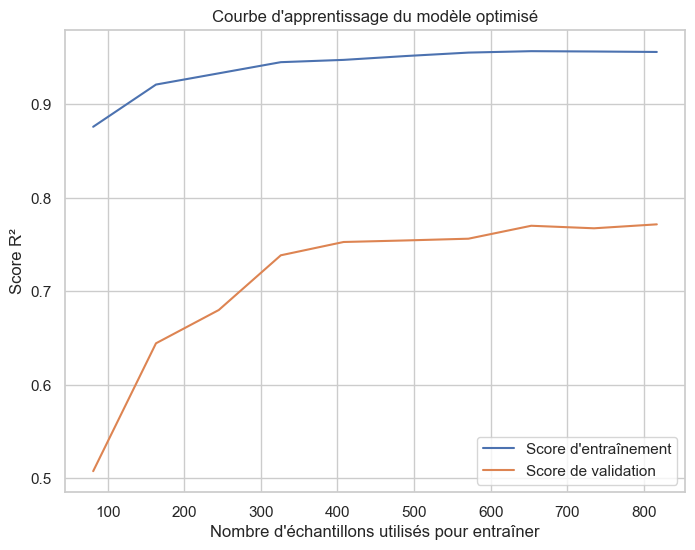

In [26]:
# 📊 Imports nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

# ✅ 1. Courbe Prédictions vs Réelles
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Prédictions vs Réelles')
plt.xlabel('Prix réel (TND)')
plt.ylabel('Prix prédit (TND)')
plt.grid(True)
plt.show()

# ✅ 2. Courbe des Résidus
residuals = y_test - y_pred_best

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred_best, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Résidus du modèle')
plt.xlabel('Prix prédit (TND)')
plt.ylabel('Résidus (erreurs)')
plt.grid(True)
plt.show()

# ✅ 3. Courbe d'apprentissage (Learning Curve)
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Score d\'entraînement')
plt.plot(train_sizes, test_scores_mean, label='Score de validation')
plt.title('Courbe d\'apprentissage du modèle optimisé')
plt.xlabel('Nombre d\'échantillons utilisés pour entraîner')
plt.ylabel('Score R²')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# 📍 8. Enregistrer le meilleur modèle trouvé au format .pkl
import pickle

model_filename = 'best_bagging_hgb_model.pkl'
with open(model_filename, 'wb') as file: # 'wb' signifie write binary
    pickle.dump(best_model, file)

print(f"💾 Modèle enregistré avec succès sous : {model_filename}")
# Après avoir ajusté le LabelEncoder
le_filename = 'label_encoder.pkl'
with open(le_filename, 'wb') as file:
    pickle.dump(le, file)
print(f"💾 LabelEncoder enregistré sous : {le_filename}")

💾 Modèle enregistré avec succès sous : best_bagging_hgb_model.pkl
💾 LabelEncoder enregistré sous : label_encoder.pkl


In [34]:
# Voir l'encodage des régions
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['region'])
region_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(region_map)
le = LabelEncoder()
le.fit(df['TypedeCulture'])
region_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(region_map)

{'Agareb': 0, 'Aghir': 1, 'Ahel Jemiaa': 2, 'Ain El Asker': 3, 'Ain Errahma': 4, 'Ain Essobh': 5, 'Ain Tebournok': 6, 'Ain Tourkia': 7, 'Akouda': 8, 'Aousja': 9, 'Barraket Essahe': 10, 'Belaoum': 11, 'Beni Khalled': 12, 'Beni Khiar': 13, 'Beni Khira': 14, 'Bent Saidane': 15, 'Bir Ben Ayed': 16, 'Bir Bouregba': 17, 'Bir Drassen': 18, 'Bir El Mellouli': 19, 'Bir Halima': 20, 'Bir Mcherga': 21, 'Bir Mcherga Gar': 22, 'Birine': 23, 'Bizerte': 24, 'Borj El Amri': 25, 'Borj Hafaiedh': 26, 'Borj Touil': 27, 'Bou Achir': 28, 'Bou Ali': 29, 'Bou Arada': 30, 'Bou Charray': 31, 'Bou Ficha': 32, 'Bou Laaba': 33, 'Bou Lazhar': 34, 'Bou Salem': 35, 'Boucha': 36, 'Bousehem': 37, 'Cap Zbib': 38, 'Cedouikeche': 39, 'Chaalil Sud': 40, 'Chafai': 41, 'Chala': 42, 'Chaouat': 43, 'Chatt Meriem': 44, 'Chegarnia': 45, 'Cherifate': 46, 'Chorfech': 47, 'Chorfech 2': 48, 'Chouigui': 49, 'Cite Chragui': 50, 'Cite El Kharrou': 51, 'Cite Guichba': 52, 'Cite Jadida': 53, 'Cite Kaa El Bal': 54, 'Cite Route Chou': 55,

In [33]:
import pandas as pd
model_filename = 'best_bagging_hgb_model.pkl' # Assurez-vous que ce fichier existe !

# Features du terrain à tester (à adapter)
property_features = {
    'region_encoded': 87,
    'Surface(m2)': 645, 
    'Proximiteplage': 1,
    'TitreFoncier': 1,
    'EauDisponible': 0,
    'electricite': 0,
    'Cloture': 0,
    'NbArbres': 0,
    'TypedeCulture': 0,
    'Irrigation': 0,
    'batiment': 0,
    'route': 0
}

# Conversion en DataFrame
input_data = pd.DataFrame([property_features])
# --- 2. Charger le Modèle Entraîné ---
try:
    with open(model_filename, 'rb') as file:
        model_filtered = pickle.load(file) # 'model_filtered' est votre 'best_model' chargé
    print(f"✅ Modèle '{model_filename}' chargé avec succès.")
except FileNotFoundError:
    print(f"❌ ERREUR : Le fichier modèle '{model_filename}' est introuvable.")
    print("Assurez-vous que le modèle a été entraîné et sauvegardé correctement dans le même dossier.")
    exit() # Arrêter si le modèle n'est pas trouvé
except Exception as e:
    print(f"❌ ERREUR lors du chargement du modèle : {e}")
    exit()

# Prédiction (décommenter quand vous avez chargé le modèle)
predicted_price = model.predict(input_data)[0]

# Paramètres de confiance (à remplacer par vos valeurs réelles)
model_mae = 15000  # Erreur moyenne absolue de votre modèle

# Affichage des résultats
print("⚡ Test Rapide de Prix Immobilier")
print("\n📋 Features du terrain:")
for feature, value in property_features.items():
    print(f"- {feature}: {value}")

print(f"\n💰 Prix estimé: {predicted_price:,.2f} TND")
print(f"📉 Marge d'erreur: ±{model_mae:,.2f} TND (±{(model_mae/predicted_price)*100:.1f}%)")
print(f"🔍 Fourchette probable: {predicted_price-model_mae:,.2f} à {predicted_price+model_mae:,.2f} TND")

# Avis de confiance simplifié
confidence = "✅ Bonne" if (model_mae/predicted_price)*100 < 20 else "⚠️ Moyenne"
print(f"\n{confidence} confiance (basée sur la précision historique du modèle)")

✅ Modèle 'best_bagging_hgb_model.pkl' chargé avec succès.
⚡ Test Rapide de Prix Immobilier

📋 Features du terrain:
- region_encoded: 87
- Surface(m2): 645
- Proximiteplage: 1
- TitreFoncier: 1
- EauDisponible: 0
- electricite: 0
- Cloture: 0
- NbArbres: 0
- TypedeCulture: 0
- Irrigation: 0
- batiment: 0
- route: 0

💰 Prix estimé: 961,753.44 TND
📉 Marge d'erreur: ±15,000.00 TND (±1.6%)
🔍 Fourchette probable: 946,753.44 à 976,753.44 TND

✅ Bonne confiance (basée sur la précision historique du modèle)


In [38]:
import pandas as pd
model_filename = 'best_bagging_hgb_model.pkl' # Assurez-vous que ce fichier existe !

# Features du terrain à tester (à adapter)
property_features = {
    'region_encoded': 115,
    'Surface(m2)': 853, 
    'Proximiteplage': 0,
    'TitreFoncier': 1,
    'EauDisponible': 0,
    'electricite': 0,
    'Cloture': 0,
    'NbArbres': 0,
    'TypedeCulture': 0,
    'Irrigation': 0,
    'batiment': 0,
    'route': 0
}

# Conversion en DataFrame
input_data = pd.DataFrame([property_features])
# --- 2. Charger le Modèle Entraîné ---
try:
    with open(model_filename, 'rb') as file:
        model_filtered = pickle.load(file) # 'model_filtered' est votre 'best_model' chargé
    print(f"✅ Modèle '{model_filename}' chargé avec succès.")
except FileNotFoundError:
    print(f"❌ ERREUR : Le fichier modèle '{model_filename}' est introuvable.")
    print("Assurez-vous que le modèle a été entraîné et sauvegardé correctement dans le même dossier.")
    exit() # Arrêter si le modèle n'est pas trouvé
except Exception as e:
    print(f"❌ ERREUR lors du chargement du modèle : {e}")
    exit()

# Prédiction (décommenter quand vous avez chargé le modèle)
predicted_price = model.predict(input_data)[0]

# Paramètres de confiance (à remplacer par vos valeurs réelles)
model_mae = 15000  # Erreur moyenne absolue de votre modèle

# Affichage des résultats
print("⚡ Test Rapide de Prix Immobilier")
print("\n📋 Features du terrain:")
for feature, value in property_features.items():
    print(f"- {feature}: {value}")

print(f"\n💰 Prix estimé: {predicted_price:,.2f} TND")
print(f"📉 Marge d'erreur: ±{model_mae:,.2f} TND (±{(model_mae/predicted_price)*100:.1f}%)")
print(f"🔍 Fourchette probable: {predicted_price-model_mae:,.2f} à {predicted_price+model_mae:,.2f} TND")

# Avis de confiance simplifié
confidence = "✅ Bonne" if (model_mae/predicted_price)*100 < 20 else "⚠️ Moyenne"
print(f"\n{confidence} confiance (basée sur la précision historique du modèle)")

✅ Modèle 'best_bagging_hgb_model.pkl' chargé avec succès.
⚡ Test Rapide de Prix Immobilier

📋 Features du terrain:
- region_encoded: 115
- Surface(m2): 853
- Proximiteplage: 0
- TitreFoncier: 1
- EauDisponible: 0
- electricite: 0
- Cloture: 0
- NbArbres: 0
- TypedeCulture: 0
- Irrigation: 0
- batiment: 0
- route: 0

💰 Prix estimé: 2,129,745.00 TND
📉 Marge d'erreur: ±15,000.00 TND (±0.7%)
🔍 Fourchette probable: 2,114,745.00 à 2,144,745.00 TND

✅ Bonne confiance (basée sur la précision historique du modèle)


In [42]:
import pandas as pd
model_filename = 'best_bagging_hgb_model.pkl' # Assurez-vous que ce fichier existe !

# Features du terrain à tester (à adapter)
property_features = {
    'region_encoded': 128,
    'Surface(m2)': 30000.0, 
    'Proximiteplage': 0,
    'TitreFoncier': 0,
    'EauDisponible': 0,
    'electricite': 0,
    'Cloture': 0,
    'NbArbres': 0,
    'TypedeCulture': 0,
    'Irrigation': 0,
    'batiment': 0,
    'route': 0
}

# Conversion en DataFrame
input_data = pd.DataFrame([property_features])
# --- 2. Charger le Modèle Entraîné ---
try:
    with open(model_filename, 'rb') as file:
        model_filtered = pickle.load(file) # 'model_filtered' est votre 'best_model' chargé
    print(f"✅ Modèle '{model_filename}' chargé avec succès.")
except FileNotFoundError:
    print(f"❌ ERREUR : Le fichier modèle '{model_filename}' est introuvable.")
    print("Assurez-vous que le modèle a été entraîné et sauvegardé correctement dans le même dossier.")
    exit() # Arrêter si le modèle n'est pas trouvé
except Exception as e:
    print(f"❌ ERREUR lors du chargement du modèle : {e}")
    exit()

# Prédiction (décommenter quand vous avez chargé le modèle)
predicted_price = model.predict(input_data)[0]

# Paramètres de confiance (à remplacer par vos valeurs réelles)
model_mae = 15000  # Erreur moyenne absolue de votre modèle

# Affichage des résultats
print("⚡ Test Rapide de Prix Immobilier")
print("\n📋 Features du terrain:")
for feature, value in property_features.items():
    print(f"- {feature}: {value}")

print(f"\n💰 Prix estimé: {predicted_price:,.2f} TND")
print(f"📉 Marge d'erreur: ±{model_mae:,.2f} TND (±{(model_mae/predicted_price)*100:.1f}%)")
print(f"🔍 Fourchette probable: {predicted_price-model_mae:,.2f} à {predicted_price+model_mae:,.2f} TND")

# Avis de confiance simplifié
confidence = "✅ Bonne" if (model_mae/predicted_price)*100 < 20 else "⚠️ Moyenne"
print(f"\n{confidence} confiance (basée sur la précision historique du modèle)")

✅ Modèle 'best_bagging_hgb_model.pkl' chargé avec succès.
⚡ Test Rapide de Prix Immobilier

📋 Features du terrain:
- region_encoded: 128
- Surface(m2): 30000.0
- Proximiteplage: 0
- TitreFoncier: 0
- EauDisponible: 0
- electricite: 0
- Cloture: 0
- NbArbres: 0
- TypedeCulture: 0
- Irrigation: 0
- batiment: 0
- route: 0

💰 Prix estimé: 712,390.44 TND
📉 Marge d'erreur: ±15,000.00 TND (±2.1%)
🔍 Fourchette probable: 697,390.44 à 727,390.44 TND

✅ Bonne confiance (basée sur la précision historique du modèle)
